In [1]:
2*3

6

In [5]:
x = 5

In [7]:
# can add comments here
x * 2

10

This is a Markdown cell.

In [11]:
# create a list
first_ten = [i for i in range(10)]
first_ten

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
for num in first_ten:
    print("{} squared is {}." .format(num, num**2))

0 squared is 0.
1 squared is 1.
2 squared is 4.
3 squared is 9.
4 squared is 16.
5 squared is 25.
6 squared is 36.
7 squared is 49.
8 squared is 64.
9 squared is 81.


# This is a big header

## This one is not as big

### This header

#### even smaller font

## Section 2.2: Some basic data anlaysis

In [15]:
import pandas as pd
reviews = pd.read_csv("./ign.csv")

In [17]:
reviews.shape

(18625, 11)

In [18]:
reviews.head(5)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [19]:
# get rid of the first column
del reviews["Unnamed: 0"]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [20]:
reviews['score'].mean()

6.950459060402666

In [22]:
len(reviews[reviews['score'] > reviews['score'].mean()])

11373

In [28]:
# make plots
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('ggplot')

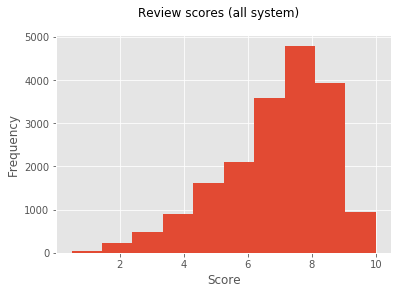

In [36]:
reviews['score'].plot(kind = 'hist'); # put ";" to avoid unnecessary output other than plot
plot.xlabel('Score');
plot.suptitle("Review scores (all system)");

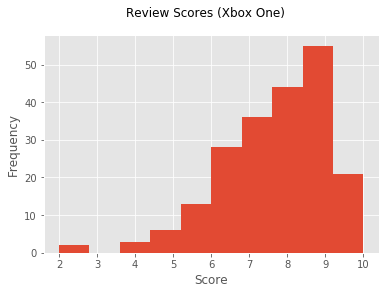

In [37]:
xbox_one_scores = reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind = "hist");
plot.xlabel("Score");
plot.suptitle("Review Scores (Xbox One)");

In [38]:
import seaborn as sns

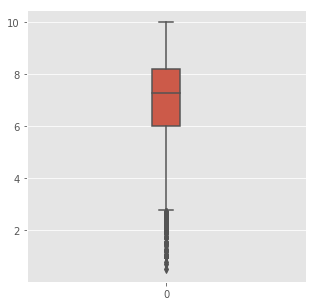

In [43]:
plot.subplots(figsize = (5,5))
sns.boxplot(data = reviews["score"], width = 0.10);

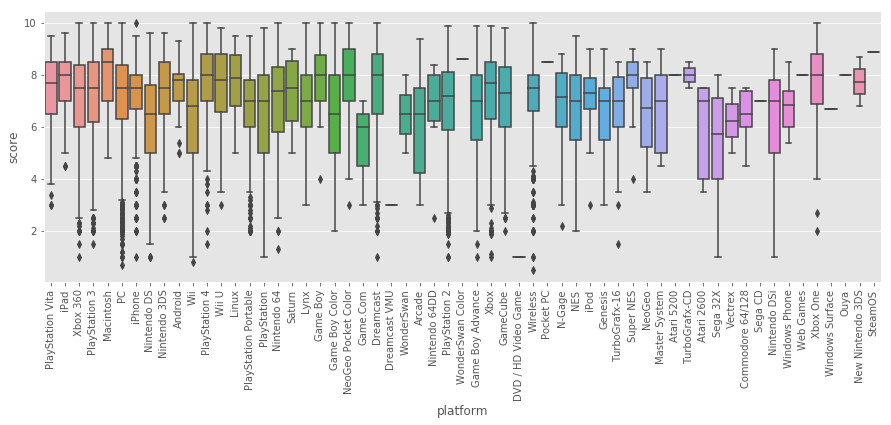

In [44]:
plot.subplots(figsize = (15,5))
reviews_boxplot_by_platform = sns.boxplot(x = 'platform', y = 'score', data = reviews)

reviews_boxplot_by_platform.set_xticklabels(reviews_boxplot_by_platform.get_xticklabels(), rotation = 90);

In [64]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


for more info about pearson correlation: find [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

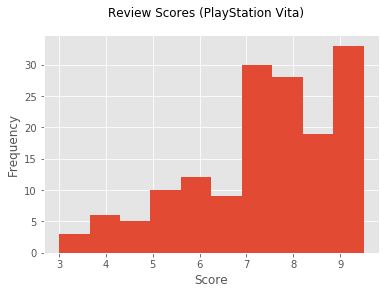

In [50]:
PlayStation_Vita_score = reviews[reviews["platform"] == "PlayStation Vita"]["score"].plot(kind = "hist");
plot.xlabel("Score");
plot.suptitle("Review Scores (PlayStation Vita)");

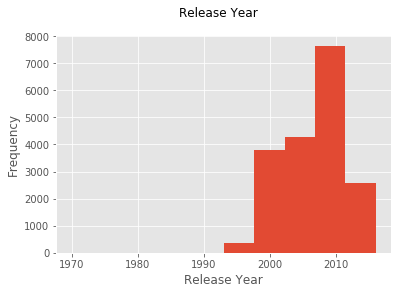

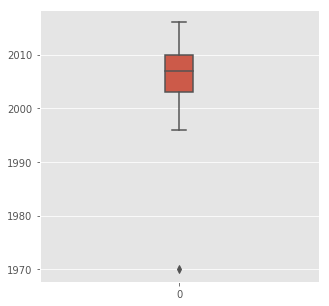

In [54]:
reviews['release_year'].plot(kind = 'hist'); # put ";" to avoid unnecessary output other than plot
plot.xlabel('Release Year');
plot.suptitle("Release Year");
plot.subplots(figsize = (5,5))
sns.boxplot(data = reviews["release_year"], width = 0.10);

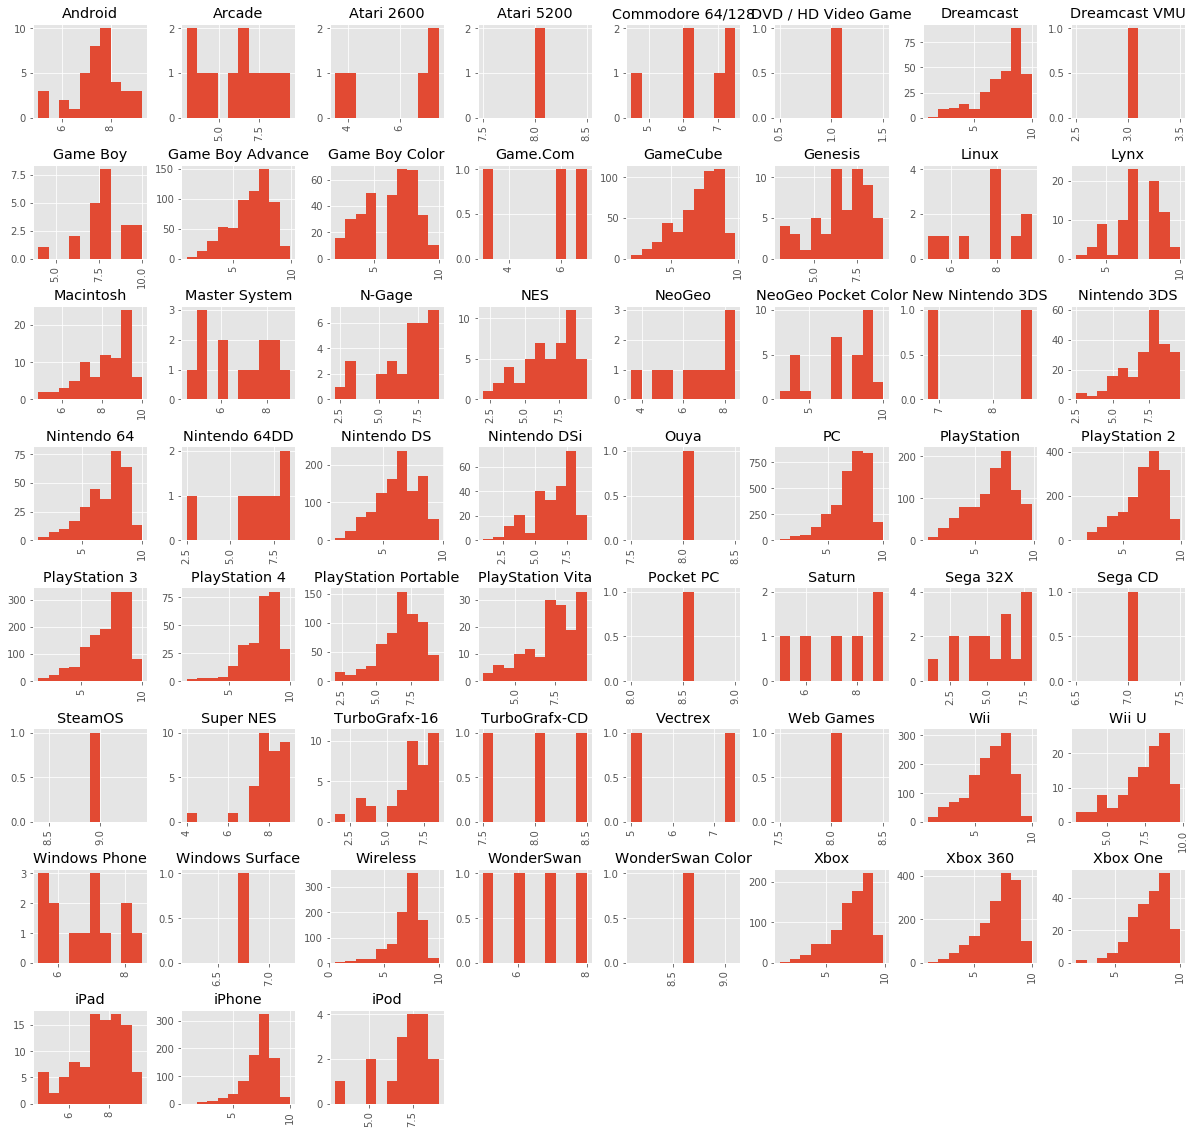

In [61]:
%matplotlib inline
import matplotlib.pyplot as plot
import pandas as pd
plot.style.use('ggplot');

plot.rcParams["figure.figsize"] = [20,20];
reviews['score'].hist(by = reviews['platform']);

## Section 3.1: Reading in data

In [1]:
from sklearn import datasets # we only import datasets from sklearn

In [2]:
digits = datasets.load_digits()

In [4]:
type(digits)

sklearn.utils.Bunch

In [5]:
dir(digits) # what attributes does digits have

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [9]:
# data dim of the pixel values
digits_data = digits.data
digits_data.shape

(1797, 64)

In [10]:
# labels for each pixel
digits_target = digits.target
digits_target.shape

(1797,)

In [11]:
# images dimension
digits_images = digits.images
digits_images.shape

(1797, 8, 8)

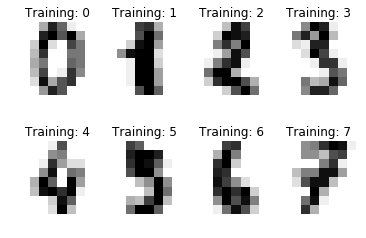

In [12]:
%matplotlib inline   # forces the plot to show up in Jupyter, other than another popped window just as in Python
import matplotlib.pyplot as plot
image_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label_list[:8]):
    plot.subplot(2, 4, index + 1)
    plot.axis('off')
    plot.imshow(image, cmap = plot.cm.gray_r, interpolation = 'nearest')
    plot.title('Training: ' + str(label))